In [65]:
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding,Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
imdb_dir = '/home/a/Downloads/aclImdb'

In [3]:
train_dir = os.path.join(imdb_dir, 'train')

In [4]:
print(train_dir)

/home/a/Downloads/aclImdb/train


In [5]:
lables = []
texts = []

In [6]:
for lable_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, lable_type)
    for fname in os.listdir(dir_name):
#         print(fname)
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
#             print(fname)
            texts.append(f.read())
            f.close()
            if lable_type == 'neg':
                lables.append(0)
            else:
                lables.append(1)

In [7]:
print(len(lables))
print(lables[24000])
print(len(texts))
print(texts[1])

25000
1
25000
One previous reviewer called this film "pure visual joy" I am wondering if s/he saw the same film that I did. "High Art" had to have the most relentlessly depressing interiors since "Seven". One can almost forgive Sheedy and Mitchell for the cliché of going to a B&B for their First Time. Of course, before they do that, one has to watch opium-den parties inhabited by people who are not apparently gainfully employed but can somehow support a flourishing drug habit. Not to mention the icy stares from those familiar movie types, the Girlfriend/Boyfriend At Start, who are well aware they're going to be thrown over sometime in the next 100 minutes or so. The movie also states that the Sheedy character has retired from professional photography for ten years now. What did she do, retire at age twenty?


In [8]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [9]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [10]:
print(type(tokenizer.word_counts))
print(tokenizer.num_words)

<class 'collections.OrderedDict'>
10000


In [11]:
dic = tokenizer.word_counts
dict= sorted(dic.items(), key=lambda d:d[1], reverse = True)
print(dict)

[('the', 336148), ('and', 164097), ('a', 163040), ('of', 145847), ('to', 135708), ('is', 107313), ('br', 101871), ('in', 93934), ('it', 79058), ('i', 77142), ('this', 75974), ('that', 69787), ('was', 48195), ('as', 46927), ('for', 44335), ('with', 44122), ('movie', 43564), ('but', 42594), ('film', 39095), ('on', 34188), ('not', 30610), ('you', 29877), ('are', 29425), ('his', 29366), ('have', 27726), ('he', 26952), ('be', 26948), ('one', 26513), ('all', 23953), ('at', 23507), ('by', 22539), ('an', 21538), ('they', 21139), ('who', 20599), ('so', 20586), ('from', 20494), ('like', 20272), ('her', 18407), ('or', 17994), ('just', 17759), ('about', 17371), ("it's", 17153), ('out', 17092), ('if', 16790), ('has', 16790), ('some', 15743), ('there', 15735), ('what', 15349), ('good', 15100), ('more', 14246), ('when', 14175), ('very', 14062), ('up', 13274), ('no', 12690), ('time', 12682), ('she', 12657), ('even', 12650), ('my', 12492), ('would', 12238), ('which', 12041), ('only', 11915), ('story', 

In [12]:
word_index = tokenizer.word_index
print('Found %s unique tokens.'%len(word_index))

Found 88582 unique tokens.


In [13]:
data = pad_sequences(sequences,maxlen=maxlen)

In [14]:
print(data.shape)
print(type(data))

(25000, 100)
<class 'numpy.ndarray'>


In [15]:
lables = np.asarray(lables)
print('shape of data tensor:',data.shape)
print('shape of label tensor',lables.shape)

shape of data tensor: (25000, 100)
shape of label tensor (25000,)


In [16]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
lables = lables[indices]

In [17]:
print(indices)

[22527  5951 17032 ... 22148  9472 22910]


In [18]:
x_train = data[:training_samples]
y_train = lables[:training_samples]
x_val = data[:validation_samples]
y_val = lables[:validation_samples]

In [19]:
print(x_train.shape)

(200, 100)


In [20]:
glove_dir = '/home/a/diskdata/glove.6B'

In [24]:
embeddings_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'))

In [25]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close

<function TextIOWrapper.close()>

In [26]:
print(type(embeddings_index))

<class 'dict'>


In [114]:
print(embeddings_index['dog'])
print(embeddings_index['the'])

[ 0.30817    0.30938    0.52803   -0.92543   -0.73671    0.63475
  0.44197    0.10262   -0.09142   -0.56607   -0.5327     0.2013
  0.7704    -0.13983    0.13727    1.1128     0.89301   -0.17869
 -0.0019722  0.57289    0.59479    0.50428   -0.28991   -1.3491
  0.42756    1.2748    -1.1613    -0.41084    0.042804   0.54866
  0.18897    0.3759     0.58035    0.66975    0.81156    0.93864
 -0.51005   -0.070079   0.82819   -0.35346    0.21086   -0.24412
 -0.16554   -0.78358   -0.48482    0.38968   -0.86356   -0.016391
  0.31984   -0.49246   -0.069363   0.018869  -0.098286   1.3126
 -0.12116   -1.2399    -0.091429   0.35294    0.64645    0.089642
  0.70294    1.1244     0.38639    0.52084    0.98787    0.79952
 -0.34625    0.14095    0.80167    0.20987   -0.86007   -0.15308
  0.074523   0.40816    0.019208   0.51587   -0.34428   -0.24525
 -0.77984    0.27425    0.22418    0.20164    0.017431  -0.014697
 -1.0235    -0.39695   -0.0056188  0.30569    0.31748    0.021404
  0.11837   -0.11319    

In [34]:
embedding_dim = 100

In [35]:
embedding_matrix = np.zeros((max_words, embedding_dim))

In [36]:
print(embedding_matrix.shape)

(10000, 100)


In [37]:
for word,i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [42]:
print(embedding_matrix[1])

[-0.038194   -0.24487001  0.72812003 -0.39961001  0.083172    0.043953
 -0.39140999  0.3344     -0.57545     0.087459    0.28786999 -0.06731
  0.30906001 -0.26383999 -0.13231    -0.20757     0.33395001 -0.33848
 -0.31742999 -0.48335999  0.1464     -0.37303999  0.34577     0.052041
  0.44946    -0.46970999  0.02628    -0.54154998 -0.15518001 -0.14106999
 -0.039722    0.28277001  0.14393     0.23464    -0.31020999  0.086173
  0.20397     0.52623999  0.17163999 -0.082378   -0.71787    -0.41531
  0.20334999 -0.12763     0.41367     0.55186999  0.57907999 -0.33476999
 -0.36559001 -0.54856998 -0.062892    0.26583999  0.30204999  0.99774998
 -0.80480999 -3.0243001   0.01254    -0.36941999  2.21670008  0.72201002
 -0.24978     0.92136002  0.034514    0.46744999  1.10790002 -0.19358
 -0.074575    0.23353    -0.052062   -0.22044     0.057162   -0.15806
 -0.30798    -0.41624999  0.37972     0.15006    -0.53211999 -0.20550001
 -1.25259995  0.071624    0.70564997  0.49744001 -0.42063001  0.26148
 -

# model

In [58]:
model = Sequential()

In [59]:
model.add(Embedding(max_words, embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [61]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [62]:
model.layers[0].set_weights = ([embedding_matrix])
model.layers[0].trainable = False

In [63]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics =['acc'])

In [113]:
x_train.shape

(200, 100)

In [64]:
history = model.fit(x_train, y_train,
             epochs = 10,
             batch_size=1,
             validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 6s 30ms/step - loss: 0.6923 - acc: 0.5300 - val_loss: 0.6895 - val_acc: 0.5212
Epoch 2/10
200/200 [==============================] - 5s 27ms/step - loss: 0.3036 - acc: 0.9700 - val_loss: 0.7205 - val_acc: 0.5339
Epoch 3/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0701 - acc: 0.9800 - val_loss: 0.8427 - val_acc: 0.5247
Epoch 4/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0169 - acc: 0.9950 - val_loss: 0.8845 - val_acc: 0.5308
Epoch 5/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0101 - acc: 0.9950 - val_loss: 0.9934 - val_acc: 0.5283
Epoch 6/10
200/200 [==============================] - 5s 26ms/step - loss: 4.4514e-04 - acc: 1.0000 - val_loss: 1.1950 - val_acc: 0.5269
Epoch 7/10
200/200 [==============================] - 5s 27ms/step - loss: 1.1584e-04 - acc: 1.0000 - val_loss: 1.2317 - val_acc: 0.5252
Epoch 8/10
20

In [112]:
print(len(x_train[1]))

100


In [66]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [67]:
epochs = range(1,len(acc) + 1)

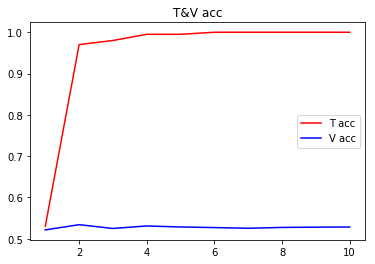

In [69]:
plt.plot(epochs, acc,'r',label='T acc')
plt.plot(epochs, val_acc,'b',label='V acc')
plt.title('T&V acc')
plt.legend()

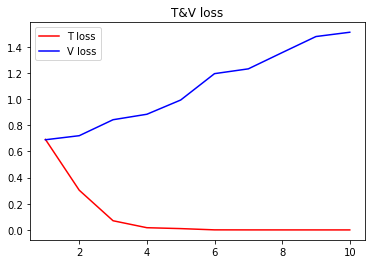

In [71]:
plt.plot(epochs, loss,'r',label='T loss')
plt.plot(epochs, val_loss,'b',label='V loss')
plt.title('T&V loss')
plt.legend()

In [73]:
model.save('glove_prep_prescess.h5')

# test_evaluate

In [74]:
test_dir = os.path.join(imdb_dir, 'test')

In [75]:
print(test_dir)

/home/a/Downloads/aclImdb/test


In [80]:
labels_test = []
texts_test = []

In [81]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, lable_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts_test.append(f.read())
            f.close()
            if label_type == 'neg':
                labels_test.append(0)
            else:
                labels_test.append(1)

In [104]:
print(len(labels_test))
print(len(texts_test))
print(len(texts_test[1]))
print(texts_test[1])

25000
25000
2004
Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO's "Carnivale" and "Rome"), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or ad

In [98]:
sequences = tokenizer.texts_to_sequences(texts_test)
x_test = pad_sequences(sequences,maxlen=maxlen)
y_test = np.asarray(labels_test)

In [103]:
print(x_test[1])
print(len(x_test[1]))
print(len(sequences))
print(len(sequences[1]))
print(sequences[1])

[  27  345    1  267    2 2293 2550   15 1851   32 1726  807  415  838
    4 1312    2 5751   30    1  451    4    1 1116    7    7   22  121
   86   11    6  167    5  127   21   61   85   42  445   20    3  280
   62   18   79   85  105    8   11  509  791    1  169  117    2  117
   18 5737 1454   20    3  125   71  853  120    2  379   50  673  493
    1  367   71   26  123   66    8 1006    4    9  464    1 4355  873
   11    6    3  324    2  773   19    5 3672   15   12 1011    5  166
   32  308]
100
25000
333
[281, 676, 164, 985, 5737, 1157, 53, 24, 2428, 2014, 1, 3365, 186, 16, 11, 220, 2572, 2251, 450, 41, 1, 1205, 587, 909, 118, 3, 182, 296, 5166, 36, 24, 4485, 975, 5, 294, 426, 24, 7094, 8, 48, 13, 2271, 14, 1, 830, 497, 123, 253, 143, 54, 334, 4, 8777, 2, 131, 9601, 2251, 1549, 23, 3, 9532, 3, 2512, 88, 1030, 221, 5, 1759, 960, 16, 4613, 2, 2375, 129, 18, 46, 86, 11, 19, 13, 8581, 29, 1, 169, 7, 7, 1, 19, 514, 16, 46, 1516, 633, 894, 835, 3, 307, 4, 1, 1121, 633, 894, 4, 2

In [105]:
model.load_weights('glove_prep_prescess.h5')

In [108]:
loss,acc= model.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 59us/step


In [109]:
print(loss,acc)

1.6760035950469971 0.5
